In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, cohen_kappa_score, precision_score, recall_score, classification_report, f1_score
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.utils import resample

#Get the functions from the python file
import sys
sys.path.append('../functions')  # Add the 'functions' directory to the Python path

from analysis_functions import correlation_matrix, test_data_knn, test_normalised_data_knn, test_col_pairs, test_weights

In [4]:
heart_data = "../data/raw/heart_disease_health_indicators_BRFSS2015.csv"
resampled_data = "../data/clean/resampled_data.csv"

heart_df = pd.read_csv(heart_data)
resampled_df = pd.read_csv(resampled_data)

In [5]:
drop_df = resampled_df.drop(['PhysHlth', 'DiffWalk','Education'],  axis=1)

In [13]:
drop_df2 = drop_df.drop(['Veggies'],  axis=1)

In [6]:
#Normalise all columns to be 0-1
normalizer = MinMaxScaler()
normalizer.fit(drop_df)

norm = normalizer.transform(drop_df)
norm_df = pd.DataFrame(norm, columns=drop_df.columns, index=drop_df.index)
norm_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,Sex,Age,Income
0,0.0,1.0,1.0,1.0,0.174419,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.50,0.000000,1.0,0.416667,1.000000
1,0.0,0.0,0.0,1.0,0.209302,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.25,0.000000,0.0,0.250000,1.000000
2,0.0,1.0,0.0,1.0,0.232558,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.00,0.000000,0.0,0.916667,0.142857
3,0.0,0.0,1.0,1.0,0.197674,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.50,0.000000,1.0,0.750000,1.000000
4,0.0,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.50,0.033333,0.0,0.416667,1.000000


In [29]:
resampled_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
1,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2,0.0,1.0,0.0,1.0,32.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,5.0,0.0,20.0,0.0,0.0,12.0,4.0,2.0
3,0.0,0.0,1.0,1.0,29.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
4,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,1.0,0.0,0.0,0.0,6.0,6.0,8.0


In [42]:
test_data_knn(resampled_df, 3, 17)

Running for n_neighbors: 17 

,k,Accuracy,Recall,Kappa
0,3,0.543315,0.519303,0.086509
1,4,0.539025,0.336551,0.077035
2,5,0.540176,0.500839,0.080155
3,6,0.536095,0.358372,0.071295
4,7,0.535049,0.504196,0.069942
5,8,0.537979,0.387117,0.075200
6,9,0.540594,0.513638,0.081054
7,10,0.535468,0.402224,0.070263
8,11,0.537142,0.514058,0.074167
9,12,0.533375,0.422367,0.066187


In [43]:
test_normalised_data_knn(resampled_df, 3, 17)

Running for n_neighbors: 17 

,k,Accuracy,Recall,Kappa
0,3,0.715422,0.723248,0.430866
1,4,0.706633,0.623374,0.412999
2,5,0.729127,0.746538,0.458304
3,6,0.724105,0.676039,0.448065
4,7,0.737079,0.758917,0.474218
5,8,0.733940,0.706253,0.467799
6,9,0.741473,0.766261,0.483014
7,10,0.741055,0.727444,0.482069
8,11,0.745972,0.770038,0.492008
9,12,0.741787,0.733110,0.483548


In [15]:
test_normalised_data_knn(drop_df, 3, 17)

Running for n_neighbors: 17 

,k,Accuracy,Recall,Kappa
0,3,0.724733,0.731431,0.449485
1,4,0.712701,0.629668,0.425142
2,5,0.737079,0.756190,0.474210
3,6,0.730488,0.682543,0.460833
4,7,0.745553,0.767940,0.491167
5,8,0.742519,0.713806,0.484957
6,9,0.751622,0.775073,0.503305
7,10,0.749634,0.732690,0.499220
8,11,0.752877,0.784096,0.505836
9,12,0.750994,0.743810,0.501967


In [16]:
test_normalised_data_knn(drop_df2, 3, 17)

Running for n_neighbors: 17 

,k,Accuracy,Recall,Kappa
0,3,0.726826,0.734998,0.453674
1,4,0.714585,0.634494,0.428919
2,5,0.740636,0.756609,0.481315
3,6,0.731638,0.686110,0.463142
4,7,0.748483,0.772346,0.497029
5,8,0.744089,0.719681,0.488108
6,9,0.756016,0.783256,0.512102
7,10,0.750262,0.734368,0.500478
8,11,0.757585,0.784935,0.515241
9,12,0.757167,0.750315,0.514314


In [35]:
test_normalised_data_knn(heart_df, 3, 8)

Running for n_neighbors: 8 

,k,Accuracy,Recall,Kappa
0,3,0.887457,0.190277,0.185210
1,4,0.901786,0.095977,0.123791
2,5,0.896622,0.158215,0.178154
3,6,0.903087,0.091995,0.122366
4,7,0.900110,0.140821,0.169656
5,8,0.904979,0.092624,0.128130


In [36]:
test_data_knn(heart_df, 3, 8)

Running for n_neighbors: 8 

,k,Accuracy,Recall,Kappa
0,3,0.886747,0.149204,0.144802
1,4,0.901096,0.059304,0.076088
2,5,0.895676,0.110226,0.124994
3,6,0.902476,0.052179,0.069787
4,7,0.899795,0.083613,0.103856
5,8,0.903382,0.043797,0.060364


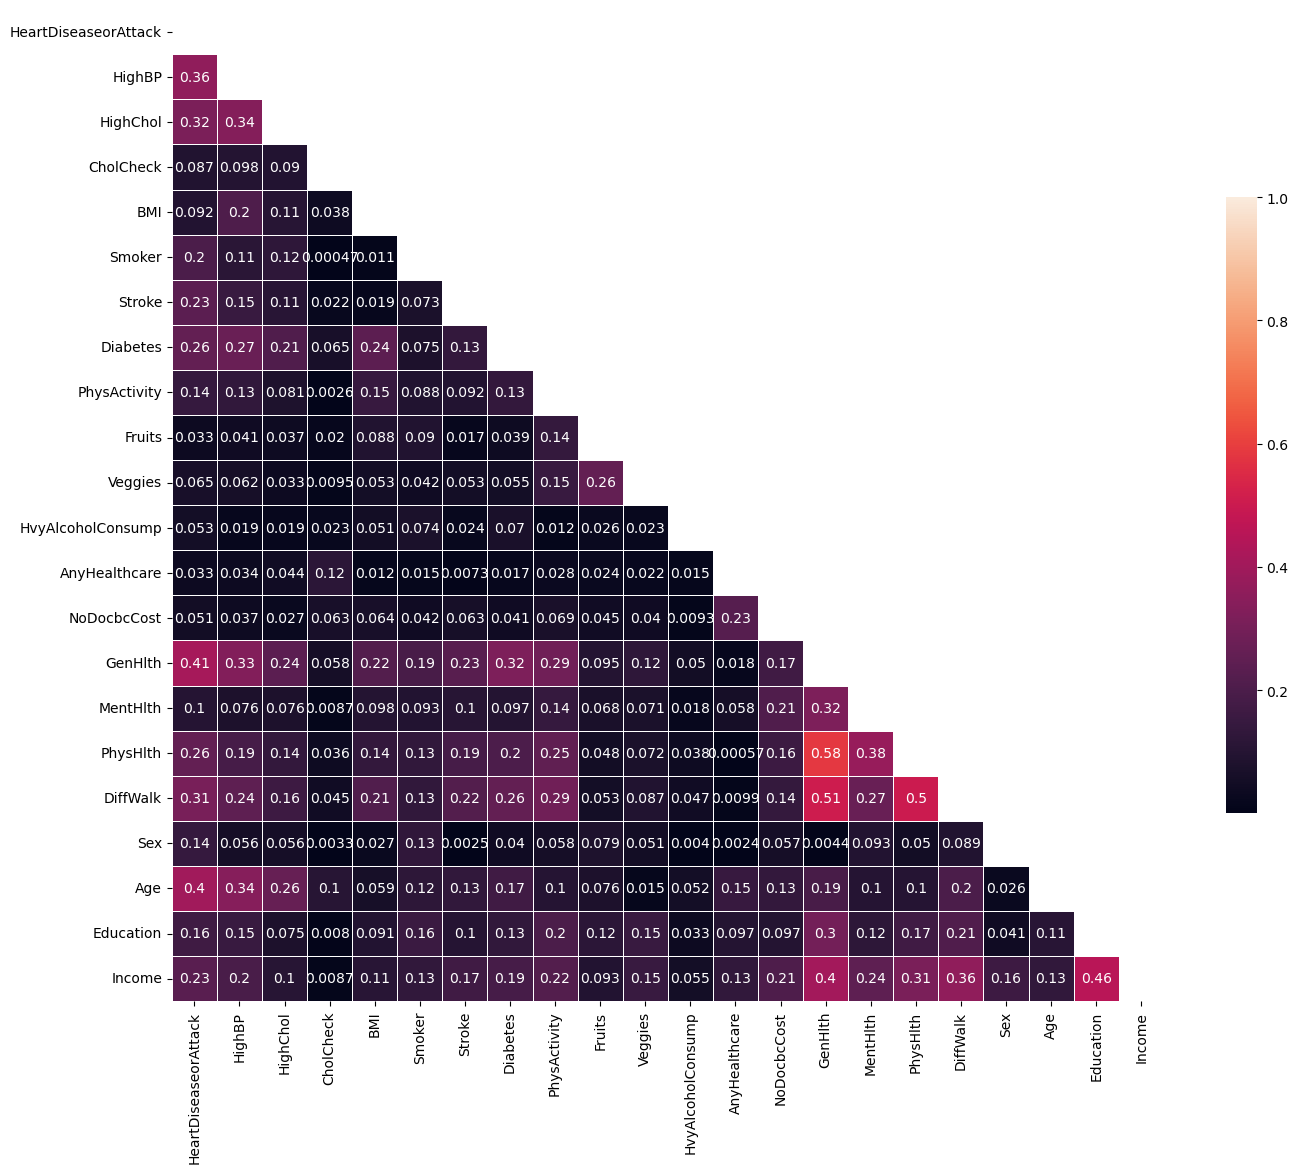

In [32]:
correlation_matrix(resampled_df)

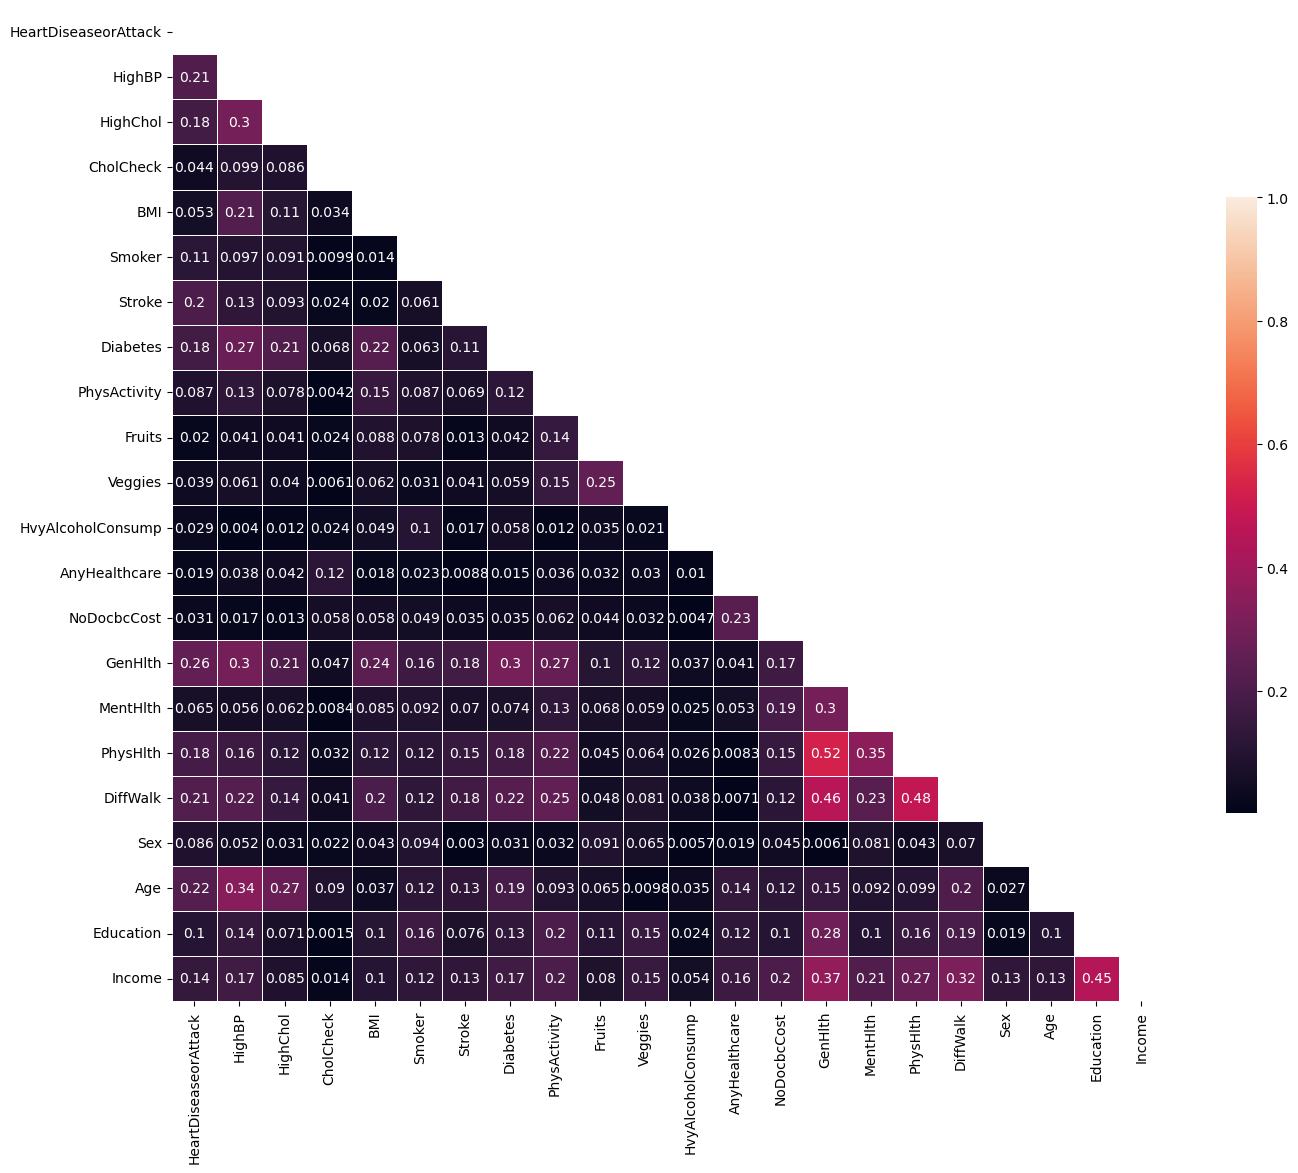

In [38]:
correlation_matrix(heart_df)

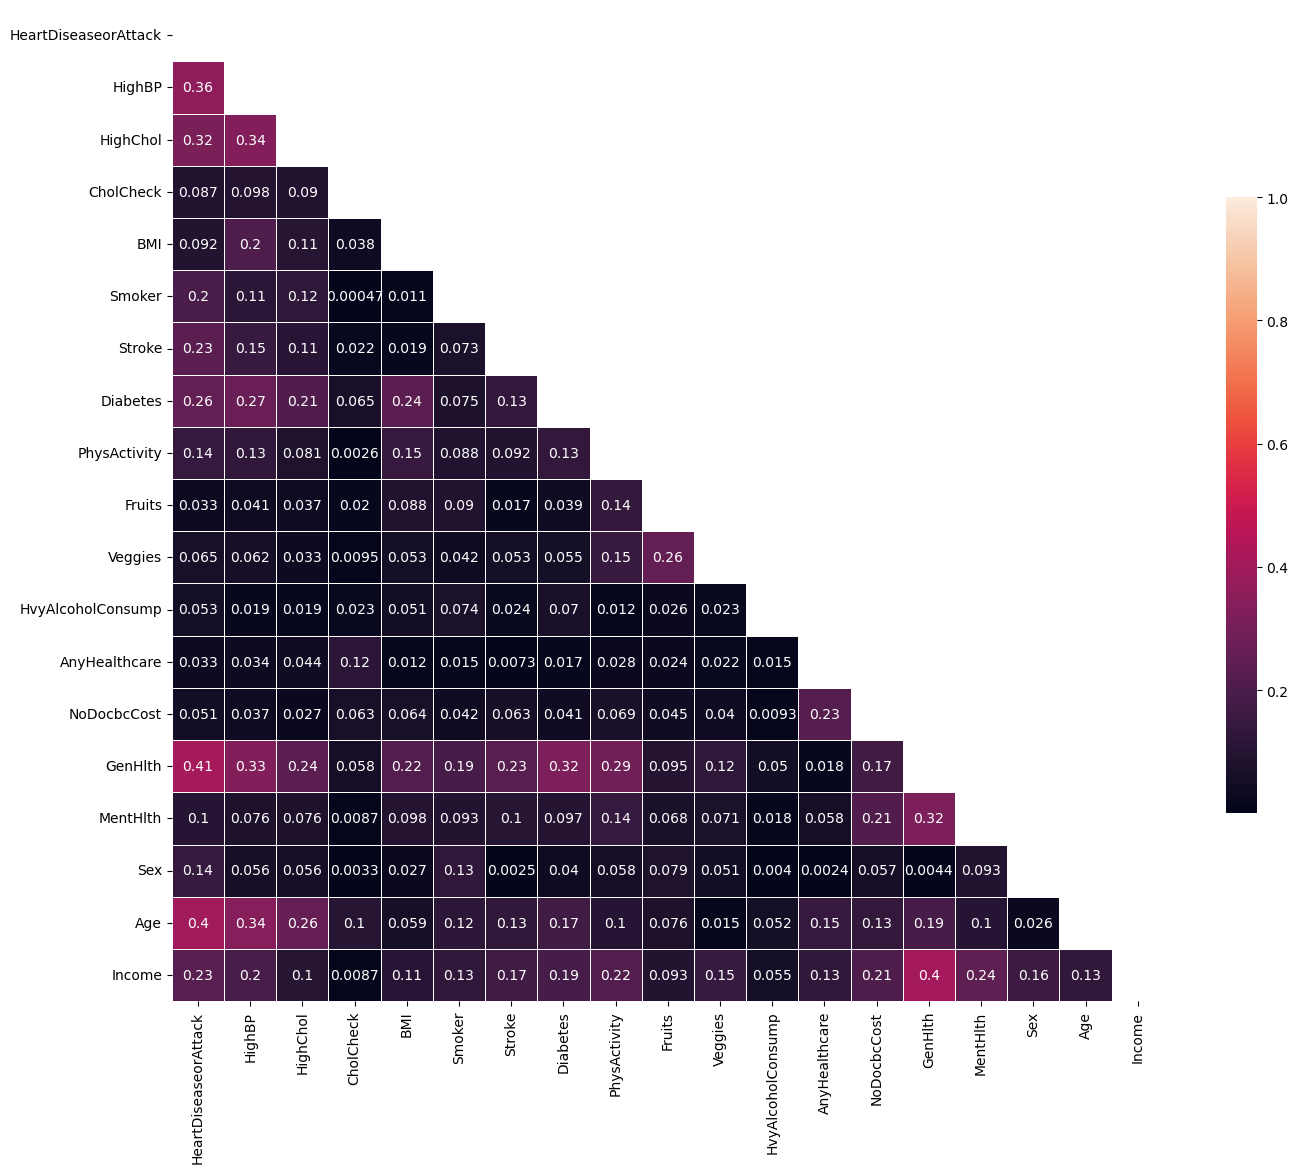

In [11]:
correlation_matrix(drop_df)

In [40]:
test_data_knn(drop_df, 3, 16)

Running for n_neighbors: 16 

,k,Accuracy,Recall,Kappa
0,3,0.529609,0.518884,0.059162
1,4,0.526679,0.341167,0.052404
2,5,0.530760,0.515736,0.061442
3,6,0.523750,0.365715,0.046682
4,7,0.526470,0.517205,0.052892
5,8,0.525842,0.397398,0.051023
6,9,0.528144,0.524759,0.056270
7,10,0.528353,0.416911,0.056135
8,11,0.527725,0.523080,0.055427
9,12,0.528249,0.434117,0.056015


In [36]:
test_normalised_data_knn(drop_df, 3, 16)

Running for n_neighbors: 16 

,k,Accuracy,Recall,Kappa
0,3,0.724733,0.731431,0.449485
1,4,0.712701,0.629668,0.425142
2,5,0.737079,0.756190,0.474210
3,6,0.730488,0.682543,0.460833
4,7,0.745553,0.767940,0.491167
5,8,0.742519,0.713806,0.484957
6,9,0.751622,0.775073,0.503305
7,10,0.749634,0.732690,0.499220
8,11,0.752877,0.784096,0.505836
9,12,0.750994,0.743810,0.501967


In [37]:
drop_df.nunique()

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     76
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
Sex                      2
Age                     13
Income                   8
dtype: int64

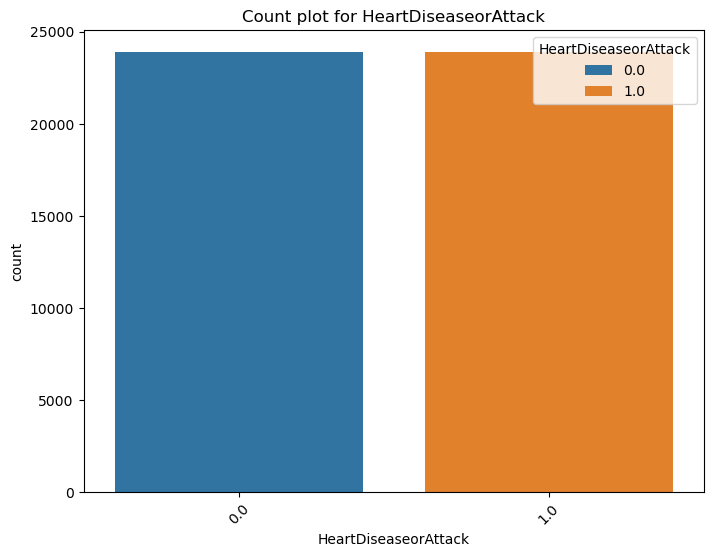

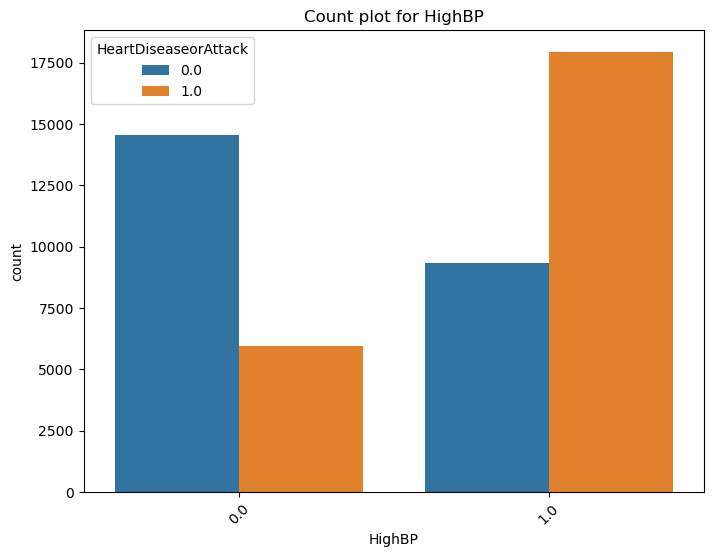

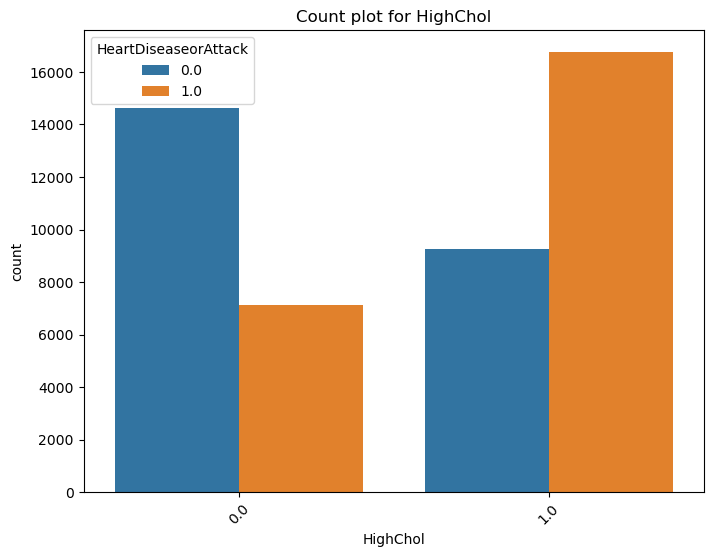

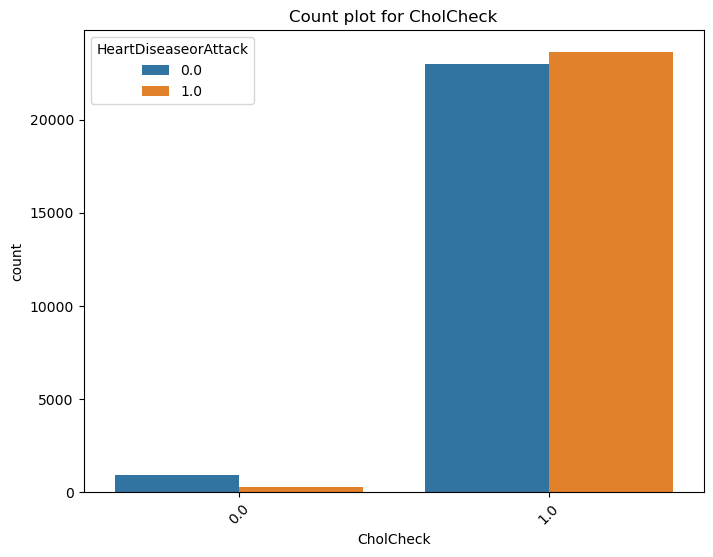

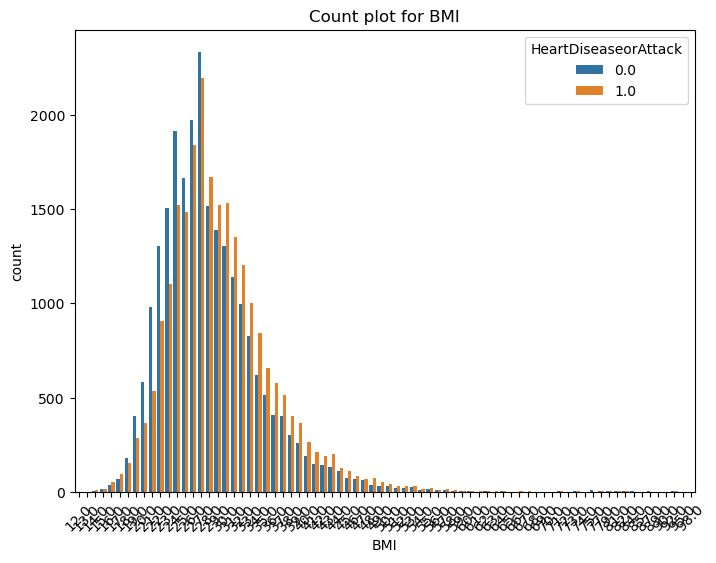

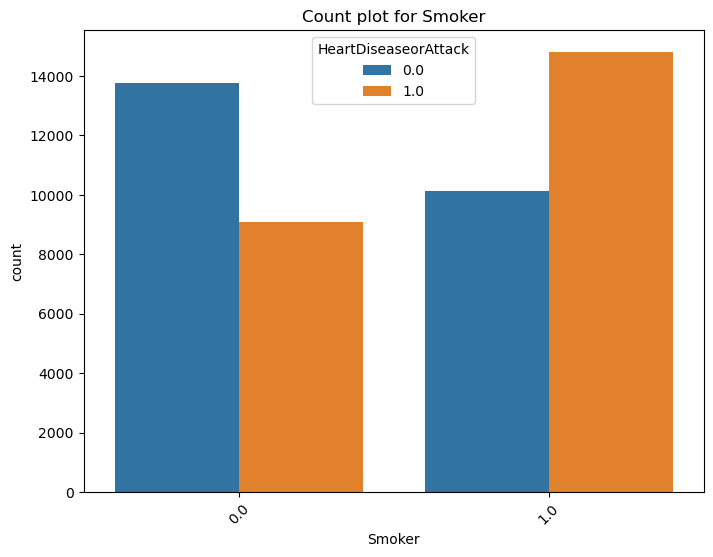

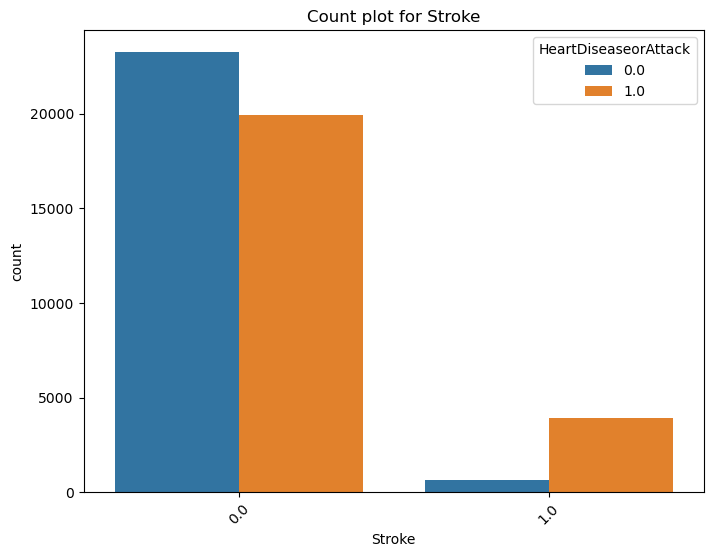

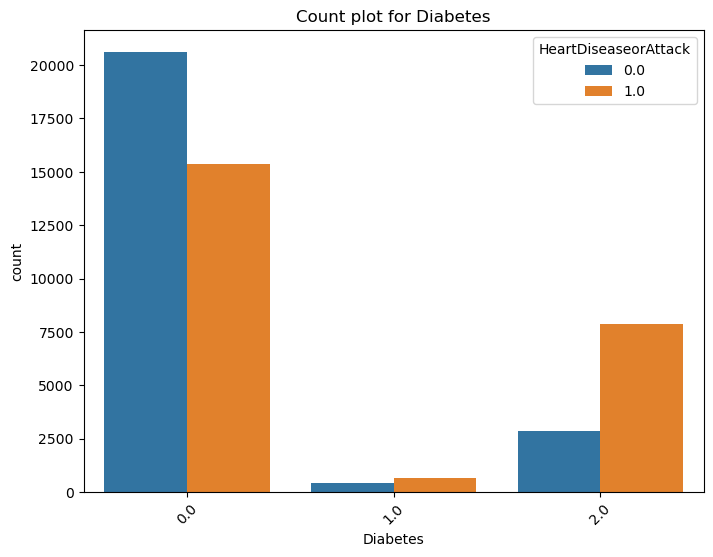

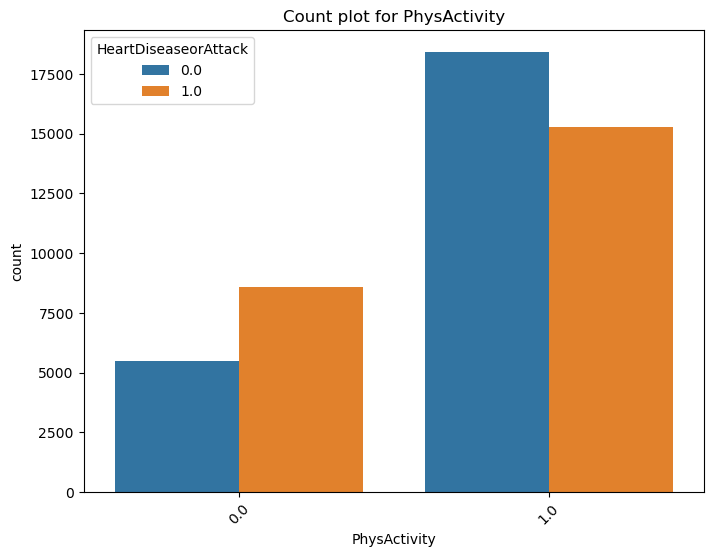

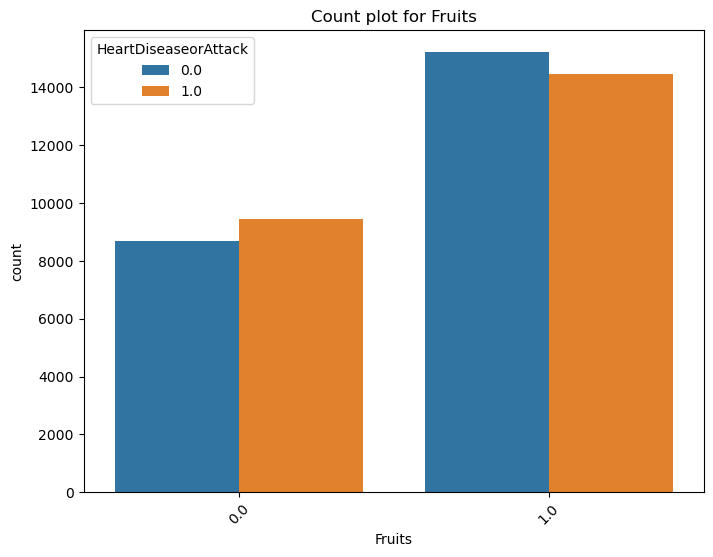

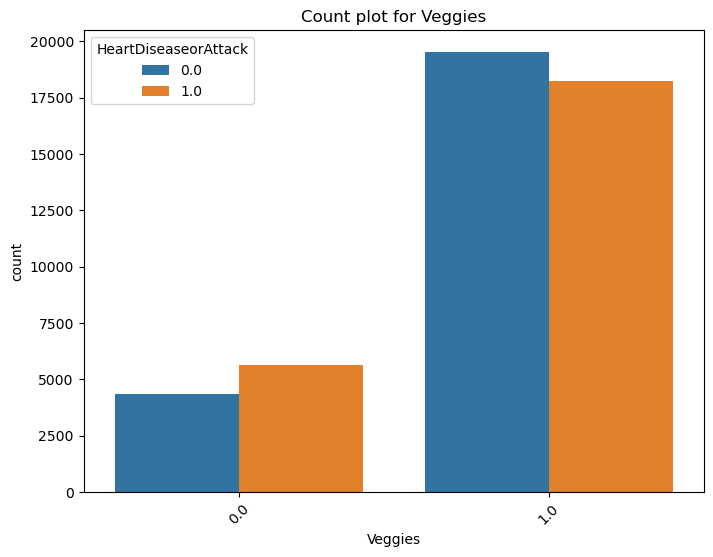

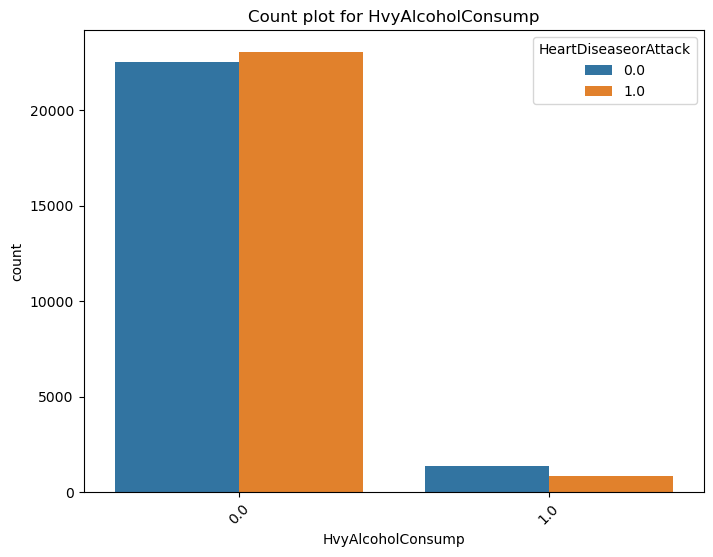

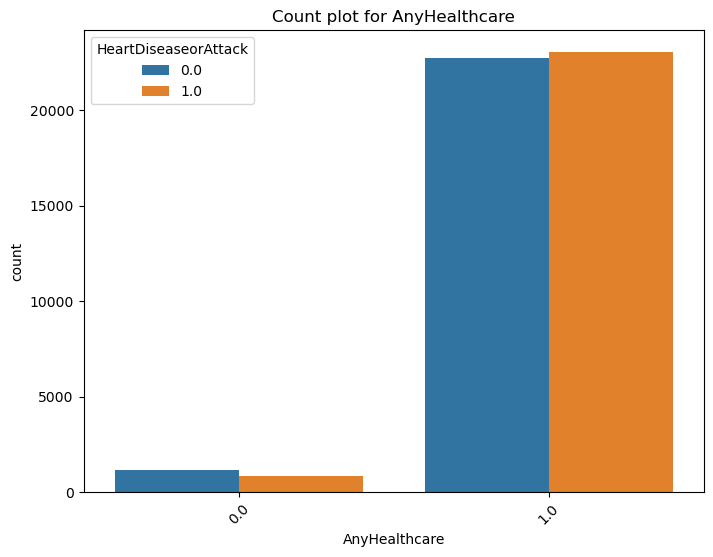

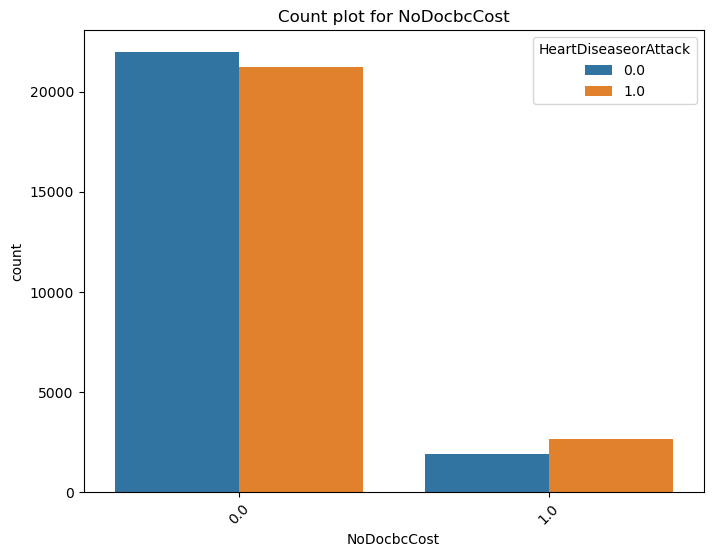

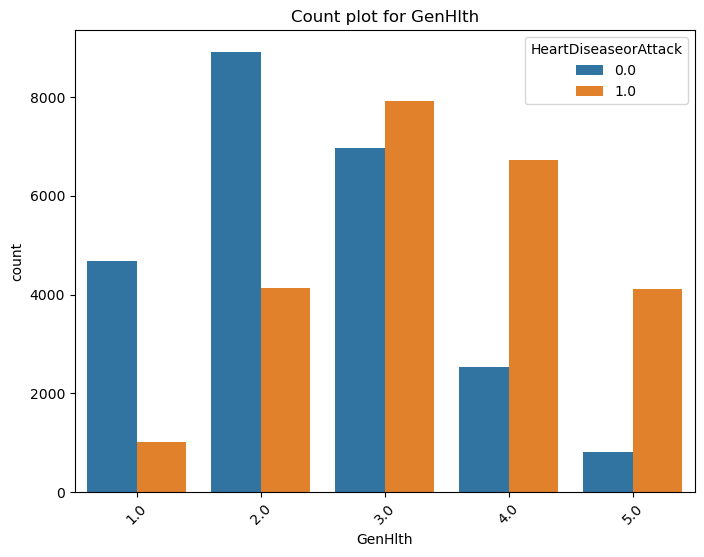

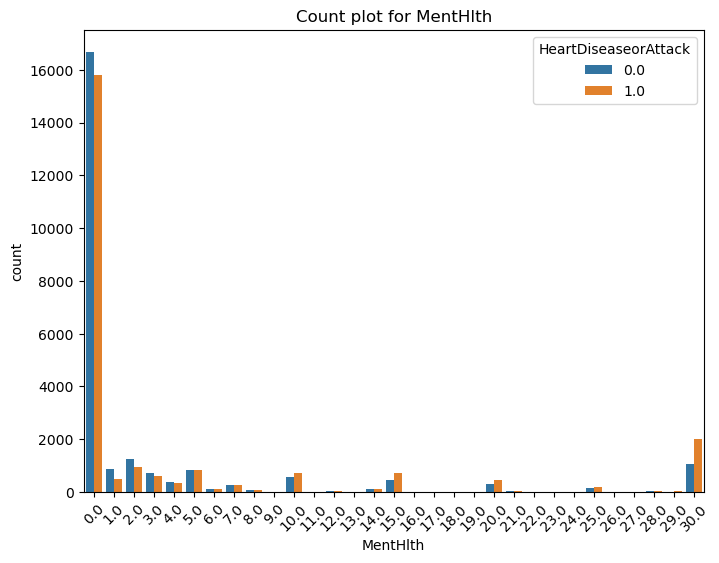

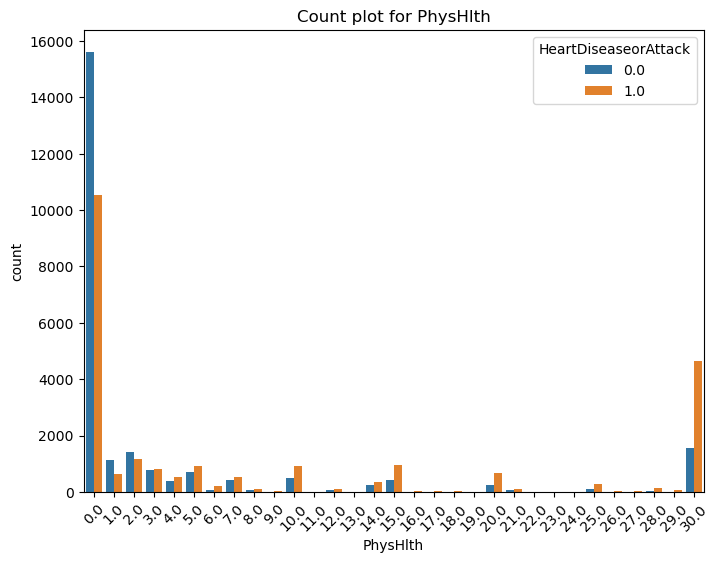

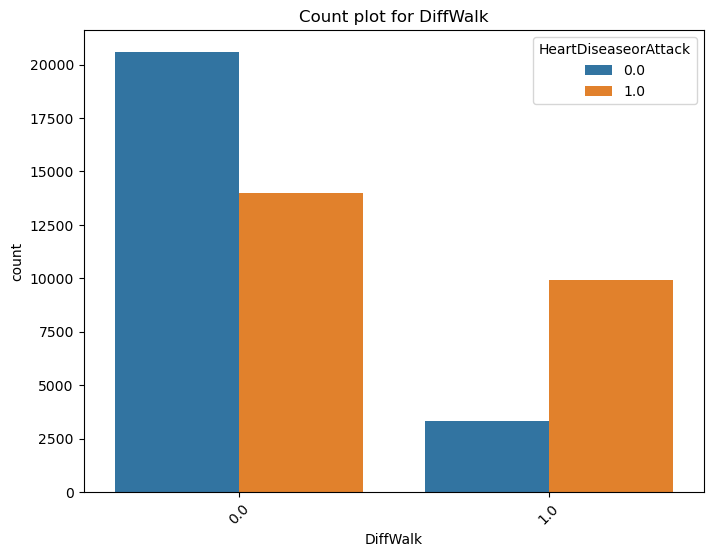

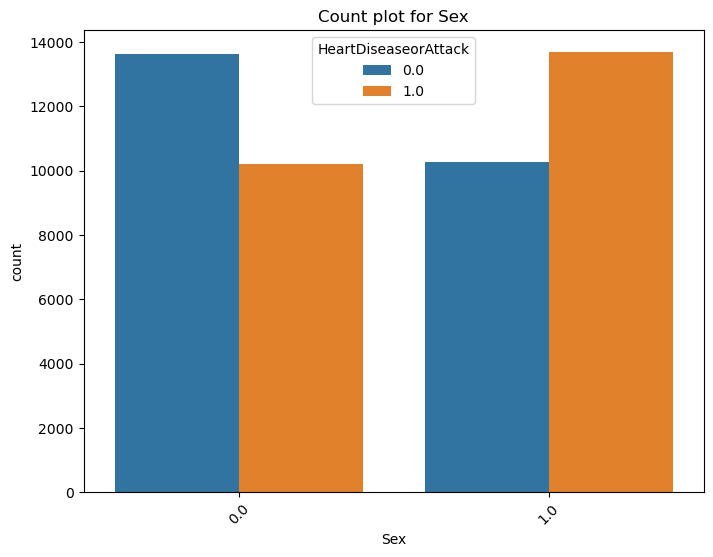

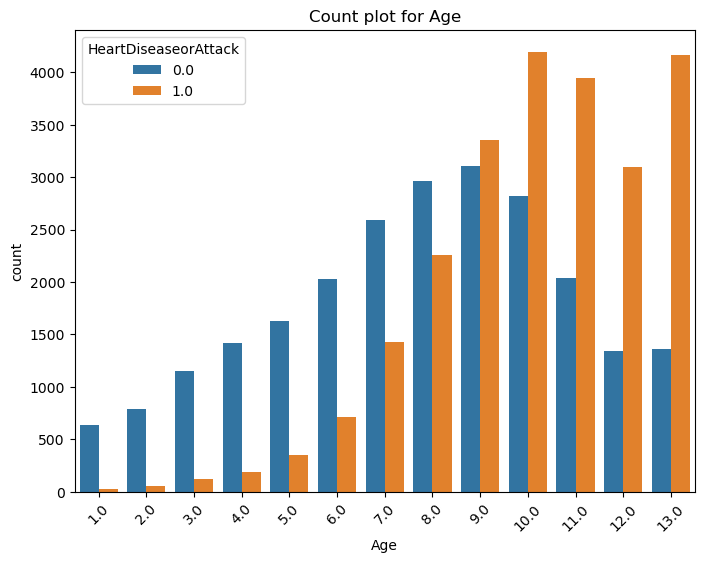

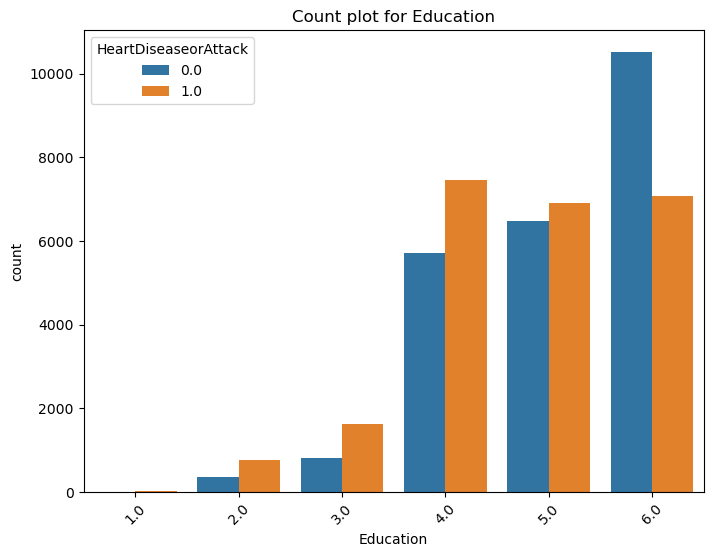

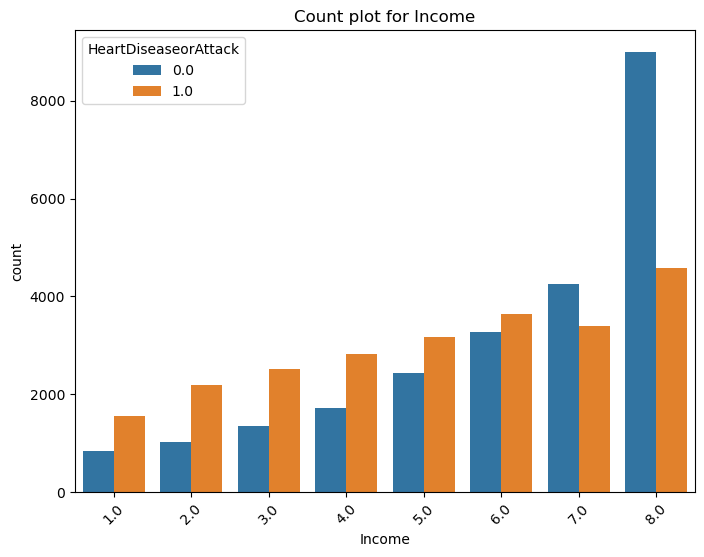

In [38]:
for col in resampled_df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=resampled_df, x=col, hue='HeartDiseaseorAttack')
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

In [39]:
result_df = test_col_pairs(drop_df)
result_df.head()

Running for Age & Income                                

,col1,col2,kappa,recall,accuracy
0,HighBP,HighChol,0.314438,0.696811,0.657146
1,HighBP,CholCheck,0.356381,0.747167,0.678071
2,HighBP,BMI,0.292606,0.612044,0.646370
3,HighBP,Smoker,0.356381,0.747167,0.678071
4,HighBP,Stroke,0.380927,0.781158,0.690312


In [52]:
result_df = result_df.sort_values(by="recall", ascending=True)
result_df.head(20)

,col1,col2,kappa,recall,accuracy
38,Fruits,CholCheck,0.000000,0.000000,0.501360
125,HvyAlcoholConsump,AnyHealthcare,0.000000,0.000000,0.501360
45,Sex,CholCheck,0.000000,0.000000,0.501360
40,HvyAlcoholConsump,CholCheck,0.000000,0.000000,0.501360
40,CholCheck,HvyAlcoholConsump,0.000000,0.000000,0.501360
41,CholCheck,AnyHealthcare,0.000000,0.000000,0.501360
132,AnyHealthcare,NoDocbcCost,0.000000,0.000000,0.501360
41,AnyHealthcare,CholCheck,0.000000,0.000000,0.501360
132,NoDocbcCost,AnyHealthcare,0.000000,0.000000,0.501360
109,HvyAlcoholConsump,Fruits,0.000000,0.000000,0.501360


In [50]:
result_df.tail(10)

,col1,col2,kappa,recall,accuracy
126,HvyAlcoholConsump,NoDocbcCost,-0.014940,0.856274,0.491525
126,NoDocbcCost,HvyAlcoholConsump,-0.014940,0.856274,0.491525
139,MentHlth,NoDocbcCost,0.018451,0.868863,0.508265
139,NoDocbcCost,MentHlth,0.018451,0.868863,0.508265
128,HvyAlcoholConsump,MentHlth,0.041650,0.883970,0.519879
128,MentHlth,HvyAlcoholConsump,0.041650,0.883970,0.519879
42,CholCheck,NoDocbcCost,0.003338,0.885648,0.500628
42,NoDocbcCost,CholCheck,0.003338,0.885648,0.500628
35,CholCheck,Stroke,0.034090,0.991607,0.515798
35,Stroke,CholCheck,0.034090,0.991607,0.515798


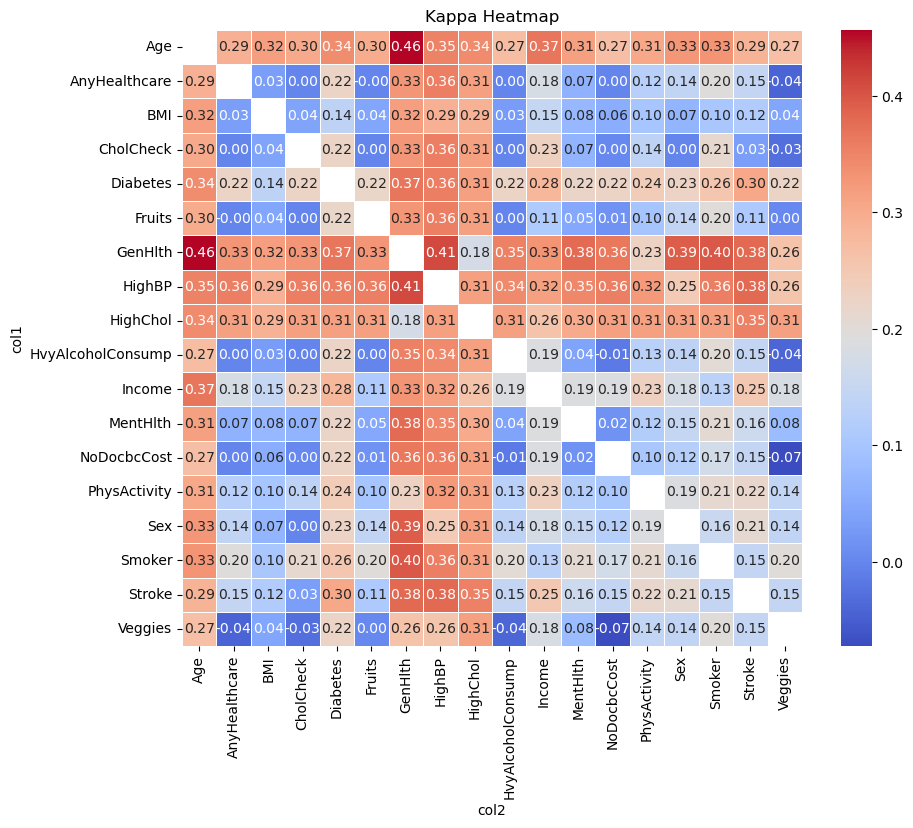

In [40]:
heatmap_data = result_df.pivot(index='col1', columns='col2', values='kappa')

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size if needed
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Kappa Heatmap')
plt.show()

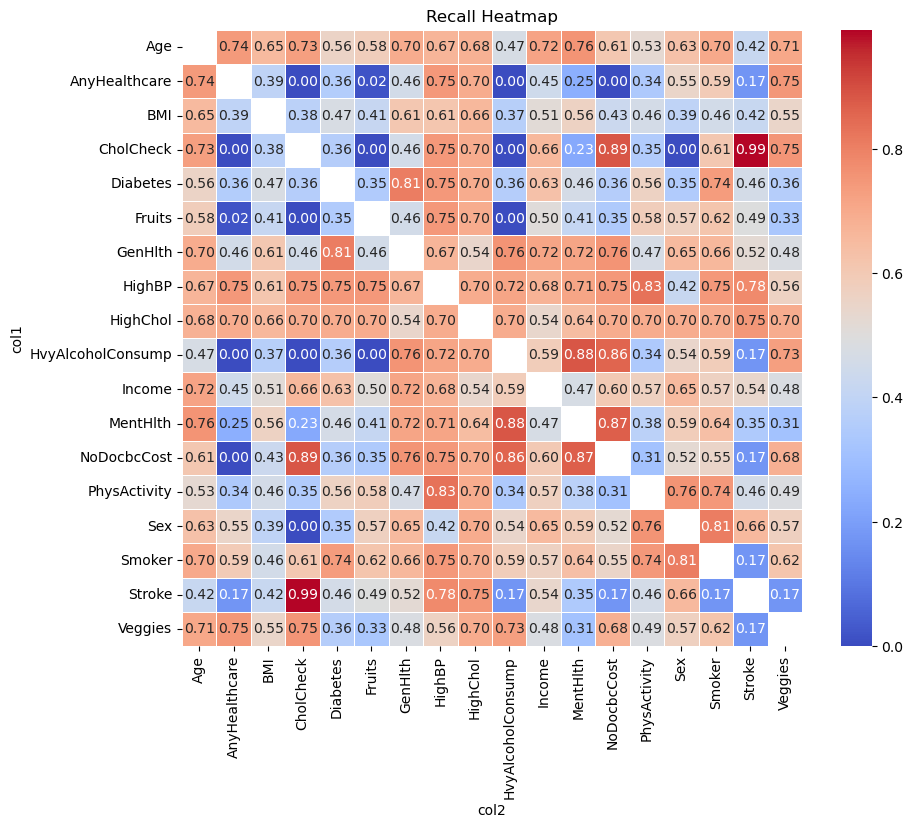

In [41]:
heatmap_data = result_df.pivot(index='col1', columns='col2', values='recall')

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size if needed
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Recall Heatmap')
plt.show()

In [17]:
drop_df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'Sex', 'Age', 'Income'],
      dtype='object')

In [54]:
drop_df.nunique()

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     76
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
Sex                      2
Age                     13
Income                   8
dtype: int64

In [11]:
cols_to_weight = ['GenHlth', 'Age', 'Diabetes', 'HighChol', 'HighBP']

weight_results = test_weights(norm_df, cols_to_weight, [0, 1, 2], k_neighbors=12)

Total combinations: 243


In [15]:
weight_results.head(30)

# NB the standard (All 1 weight) results for 12 neighbours are:
# accuracy: 0.750994	
# recall: 0.743810
# kappa: 0.501967
# The differences here are too small to change for

,Accuracy,Recall,Kappa,GenHlth,Age,Diabetes,HighChol,HighBP
217,0.752249,0.757239,0.504510,2,2,0,0,1
218,0.751831,0.755980,0.503671,2,2,0,0,2
136,0.752145,0.755350,0.504296,1,2,0,0,1
223,0.757062,0.755350,0.514118,2,2,0,2,1
220,0.756644,0.754721,0.513280,2,2,0,1,1
109,0.749634,0.754301,0.499278,1,1,0,0,1
224,0.757167,0.754301,0.514324,2,2,0,2,2
221,0.756539,0.754091,0.513070,2,2,0,1,2
146,0.754865,0.753882,0.509726,1,2,1,0,2
145,0.754133,0.753672,0.508262,1,2,1,0,1


In [22]:
cols_to_weight = ['MentHlth', 'BMI', 'Fruits', 'Veggies']

weight_results2 = test_weights(norm_df, cols_to_weight, [0, 1, 2], k_neighbors=12)
weight_results2.head(20)

#Take out Veggies?

Total combinations: 81


,Accuracy,Recall,Kappa,MentHlth,BMI,Fruits,Veggies
9,0.758527,0.761016,0.517058,0,1,0,0
18,0.756330,0.758917,0.512665,0,2,0,0
0,0.756121,0.757868,0.512244,0,0,0,0
45,0.756225,0.757449,0.512452,1,2,0,0
27,0.755388,0.757239,0.510779,1,0,0,0
3,0.756748,0.756609,0.513494,0,0,1,0
54,0.755179,0.756399,0.510359,2,0,0,0
36,0.755493,0.754721,0.510982,1,1,0,0
63,0.755911,0.754721,0.511818,2,1,0,0
15,0.757376,0.754091,0.514742,0,1,2,0


In [27]:
cols_to_weight = ['Veggies']

weight_results2 = test_weights(norm_df, cols_to_weight, [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 2, 10, 20], k_neighbors=12)
weight_results2

#Take out Veggies?

Total combinations: 10


,Accuracy,Recall,Kappa,Veggies
0,0.756958,0.750105,0.513895,0.0
2,0.753714,0.746328,0.507407,0.4
1,0.753505,0.746118,0.506988,0.2
3,0.752773,0.744859,0.505522,0.6
4,0.750785,0.744650,0.501551,0.8
6,0.750785,0.744230,0.501550,1.2
5,0.750994,0.743810,0.501967,1.0
8,0.750157,0.743601,0.500294,10.0
9,0.750262,0.743601,0.500503,20.0
7,0.750157,0.743181,0.500293,2.0


In [29]:
cols_to_weight = ['MentHlth']

weight_results = test_weights(norm_df, cols_to_weight, [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 2, 10, 20], k_neighbors=12)
weight_results

#Minimal change

Total combinations: 10


,Accuracy,Recall,Kappa,MentHlth
1,0.750785,0.745699,0.501554,0.2
0,0.751099,0.744440,0.502177,0.0
3,0.749634,0.744230,0.499251,0.6
5,0.750994,0.743810,0.501967,1.0
4,0.749843,0.743391,0.499667,0.8
2,0.749425,0.741292,0.498825,0.4
6,0.746914,0.739824,0.493806,1.2
7,0.748588,0.739824,0.497149,2.0
8,0.743147,0.735208,0.486270,10.0
9,0.743775,0.734998,0.487523,20.0


In [31]:
cols_to_weight = ['HvyAlcoholConsump', 'AnyHealthcare']

weight_results = test_weights(norm_df, cols_to_weight, [0, 0.2, 0.5, 1, 10], k_neighbors=12)
weight_results

#Minimal change

Total combinations: 25


,Accuracy,Recall,Kappa,HvyAlcoholConsump,AnyHealthcare
8,0.752877,0.748426,0.505741,0.2,1.0
7,0.752354,0.748007,0.504695,0.2,0.5
12,0.751203,0.745909,0.502390,0.5,0.5
6,0.750575,0.745909,0.501136,0.2,0.2
5,0.751308,0.745699,0.502599,0.2,0.0
13,0.751308,0.745699,0.502599,0.5,1.0
2,0.750785,0.744230,0.501550,0.0,0.5
10,0.750889,0.744020,0.501758,0.5,0.0
3,0.750889,0.743810,0.501758,0.0,1.0
11,0.749843,0.743810,0.499668,0.5,0.2


In [25]:
cols_to_weight = ['PhysActivity', 'HvyAlcoholConsump']

weight_results3 = test_weights(norm_df, cols_to_weight, [0, 1, 2, 10], k_neighbors=12)
weight_results3

# No significant improvements vs all 1

Total combinations: 16


,Accuracy,Recall,Kappa,PhysActivity,HvyAlcoholConsump
12,0.752145,0.745699,0.504270,10,0
8,0.751622,0.745069,0.503224,2,0
13,0.750889,0.744230,0.501759,10,1
4,0.750889,0.743810,0.501758,1,0
5,0.750994,0.743810,0.501967,1,1
9,0.750785,0.743810,0.501549,2,1
1,0.752877,0.743601,0.505728,0,1
0,0.751936,0.743391,0.503846,0,0
10,0.751203,0.742761,0.502382,2,2
11,0.751203,0.742761,0.502382,2,10


In [33]:
cols_to_weight = ['BMI', 'Age', 'GenHlth']

res = test_weights(norm_df, cols_to_weight, [1, 2, 5, 10, 20])
res.head(20)

Total combinations: 125


,Accuracy,Recall,Kappa,BMI,Age,GenHlth
76,0.740322,0.766261,0.480716,10,1,2
80,0.744716,0.765632,0.489489,10,2,1
111,0.743461,0.763114,0.486975,20,5,2
81,0.741892,0.762065,0.483838,10,2,2
75,0.737707,0.761645,0.475480,10,1,1
106,0.740636,0.761435,0.481329,20,2,2
79,0.738544,0.760596,0.477148,10,1,20
114,0.742519,0.760386,0.485087,20,5,20
113,0.741787,0.760386,0.483624,20,5,10
112,0.742938,0.760386,0.485923,20,5,5


In [35]:
# NB the standard (All 1 weight) results for 12 neighbours are:
# accuracy: 0.750994	
# recall: 0.743810
# kappa: 0.501967
# The differences here are too small to change for

# Upweighting BMI improves recall, but reduces Kappa and Accuracy